import sys
!{sys.executable} -m pip install scikit-image

In [1]:
import numpy as np
import scipy.ndimage as ndim
from functools import reduce
from celluloid import Camera
import matplotlib.pyplot as plt
from image_to_numpy import *
from skimage.segmentation import felzenszwalb

import pandas as pd

In [22]:
def object_labeler(im_array):
    return ndim.label(im_array, ndim.generate_binary_structure(2,2))


def separate_labeled_objects(im_array, labeled_arr, max_label=None):
    max_label = np.max(labeled_arr) if max_label is None else max_label
    return [im_array * (labeled_arr == label + 1)
            for label in range(max_label)]


def separate_objects(im_array):
    return separate_labeled_objects(im_array, *object_labeler(im_array))


def get_perimeters(obj_array, thickness=3):
    filled_and_eroded = ndim.binary_erosion(ndim.binary_fill_holes(obj_array), ndim.generate_binary_structure(2,2))
    perim = [np.logical_and(np.logical_not(filled_and_eroded), obj_array)]
    eroded = np.logical_and(filled_and_eroded, obj_array)
    if not eroded.any():
        return perim
    return perim + get_perimeters(eroded)


def get_perimeters_checking_for_new_areas(obj_array, thickness=3):
    filled_and_eroded = ndim.binary_erosion(ndim.binary_fill_holes(obj_array), ndim.generate_binary_structure(2,2))
    perim = [np.logical_and(np.logical_not(filled_and_eroded), obj_array)]
    eroded = np.logical_and(filled_and_eroded, obj_array)
    if not eroded.any():
        return perim
    return perim + [get_perimeters(eroded_arr) for eroded_arr in separate_objects(eroded)]


def make_cord_grid(arr):
    return np.meshgrid(np.arange(0, arr.shape[0]), np.arange(0, arr.shape[1]))


def perimeter_cords(perim_arr, cord_arr):
    pass

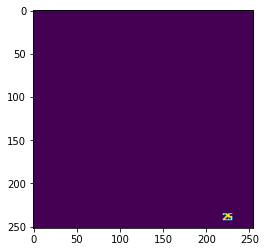

In [34]:
out = scale_to_white_to_black(
        numpy_image_to_greyscale(
                image_to_numpy_array(
                        open_image("example_image_5.png"))))

perims = []
fig = plt.figure()
for perim in [get_perimeters(obj) for obj in separate_objects(out)]:
    fig.clear()
    for i in range(0, len(perim), 3):
        perims.append(reduce(lambda x,y: np.logical_or(x,y), perim[i:i+3]))
        plt.imshow(perims[-1])
      
# fig = plt.figure()
# for i, obj in enumerate(separate_objects(out)):
#     fig.clear()
#     cam = Camera(fig)
#     count = 0
#     for perim in get_perimeters(obj):
#         obj = np.logical_and(np.logical_not(perim), obj)
#         count += 1
#         if count%3==0:
#             plt.imshow(obj)
#             cam.snap()
#     plt.imshow(obj)
#     cam.snap()

#     animation = cam.animate()
#     animation.save(f'Perim_Tests/animation{i}.gif')

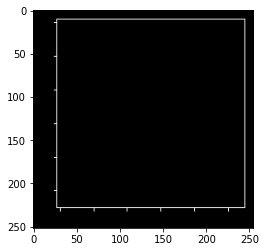

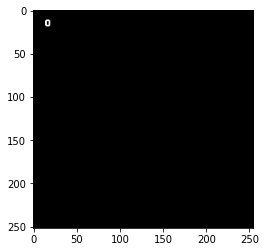

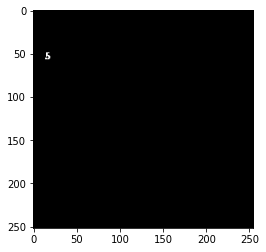

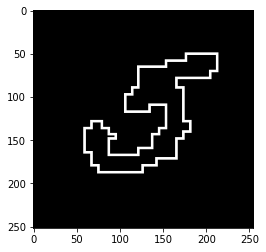

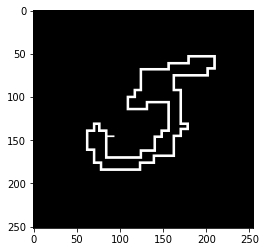

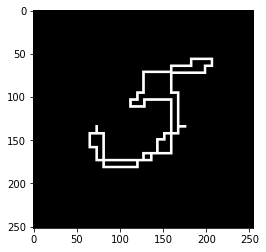

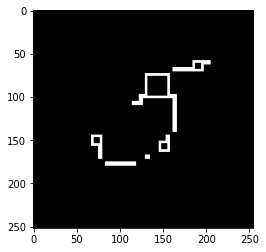

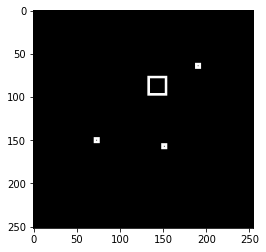

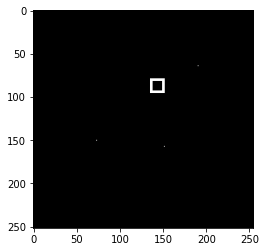

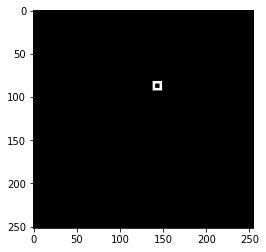

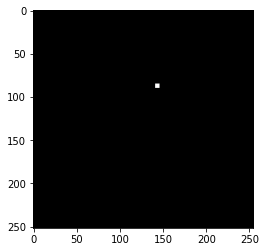

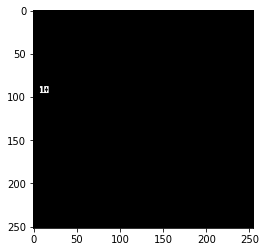

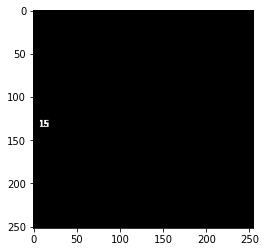

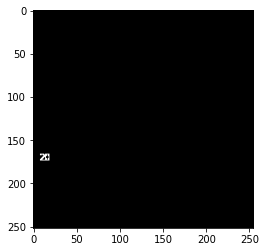

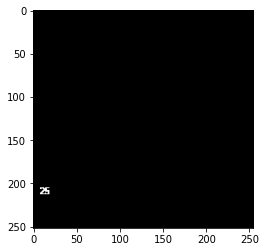

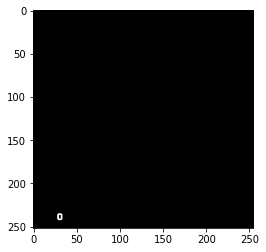

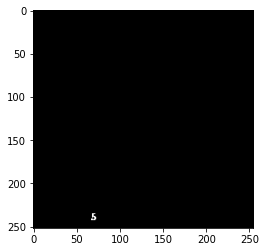

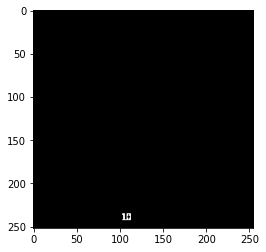

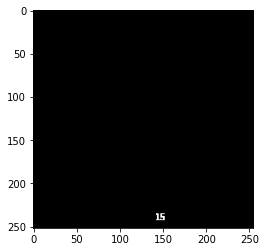

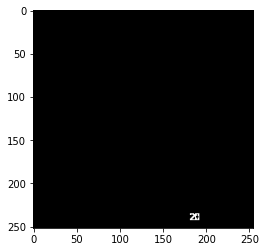

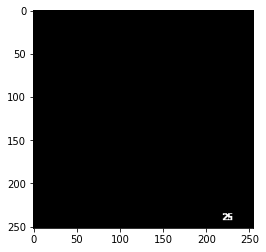

In [35]:
for i in perims:
    show_image(i)